In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway
# For the USA cholopleth map
import matplotlib
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

In [3]:
plt.style.use("seaborn-notebook")

# Beers Analys and Beer Bottles and Cans Production in USA

## Author: Kostadin Kostadinov

![alternative text](beer.jpg)

## Abstract
First, we will load and work with data about beer reviews and we will look at some interesting things like breweries, beer styles and alcohol content. We will answer the question __"Does the beers overall rating depend on its alcohol content?"__, then we will proceed with analyzing the proteins in the beer and its vitamin B12 and we will put a end on our research with data about Beer bottles and cans producted in USA between 2010 and 2015 year.
We will visualize it with a cholopleth map.

## Loading and reading data about beer reviews
First, let's read a dataset for beer reviews from all over the world from November 2011 onwards.
We will remove "review_time" because it will be useless in this research.

In [4]:
beer_reviews_data = pd.read_csv("data/beer_reviews.csv")
beer_reviews_data = beer_reviews_data.drop("review_time",axis=1)
beer_reviews_data

,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,1075,Caldera Brewing Company,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,1075,Caldera Brewing Company,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


We will plot a histogram to see all taste reviews and see the common taste rate.

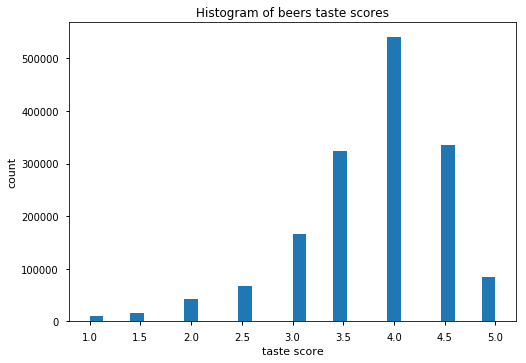

In [5]:
plt.hist(beer_reviews_data.review_taste,bins=30)
plt.title("Histogram of beers taste scores")
plt.xlabel("taste score")
plt.ylabel("count")
plt.show()

From the histogram we can see that the tendency is a higher review score (mostly 4.0). Maybe we can say that the beers in this dataset are mostly good. Let's see the total rating histogram too.

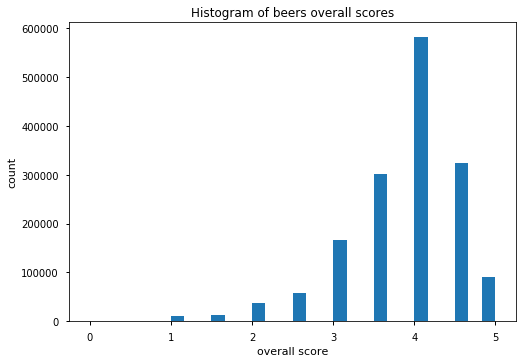

In [6]:
plt.hist(beer_reviews_data.review_overall,bins=30)
plt.title("Histogram of beers overall scores")
plt.xlabel("overall score")
plt.ylabel("count")
plt.show()

It is the almost the same but in some reason the histogram is visually broken(atleast on my PC).

__In this research we will be using only the overall rating for simplicity.__

## Working with the beer raters
Before analysing which type and style of beer is highest rated it will be good to see the raters a little bit.

First we will check for NaN values in the reviewer_profilename column.

In [7]:
beer_reviews_data[beer_reviews_data.review_profilename.isna()]

,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
8869,395,Bluegrass Brewing Co. - East St. Matthew's,4.0,4.0,3.5,NaN,American Double / Imperial Stout,3.0,3.5,Jefferson's Reserve Bourbon Barrel Stout,8.5,29687
22125,1199,Founders Brewing Company,4.0,4.5,4.5,NaN,American Double / Imperial Stout,4.0,4.5,Founders Breakfast Stout,8.3,11757
31822,1199,Founders Brewing Company,4.0,4.0,4.0,NaN,American IPA,4.0,4.5,Founders Centennial IPA,7.2,5441
33500,1199,Founders Brewing Company,5.0,5.0,5.0,NaN,American Double / Imperial Stout,5.0,5.0,Founders KBS (Kentucky Breakfast Stout),11.2,19960
33678,1199,Founders Brewing Company,5.0,5.0,5.0,NaN,American Double / Imperial Stout,5.0,5.0,Founders KBS (Kentucky Breakfast Stout),11.2,19960
38761,1417,Black Sheep Brewery PLC,3.0,3.0,4.0,NaN,English Brown Ale,3.5,3.0,Riggwelter Yorkshire Ale,5.7,3939
40690,568,Browar Okocim S.A. (Carlsberg),4.5,3.5,4.0,NaN,Baltic Porter,3.0,3.0,Okocim Porter,8.1,1504
42887,6836,Martins Bräu Erste Freiburger Gasthausbrauerei,5.0,3.5,4.0,NaN,German Pilsener,3.5,5.0,Martins Bräu Pils,4.5,19261
50208,394,Stoudts Brewing Co.,4.5,3.5,4.0,NaN,Extra Special / Strong Bitter (ESB),4.0,3.5,Stoudt's Scarlet Lady ESB,5.0,1622
69141,466,South African Breweries plc,2.5,2.5,2.0,NaN,American Adjunct Lager,3.0,2.0,Castle Lager,5.0,2476


We will set the non-NaN values in another dataset.Make a dataset with raters name,count of rated beers and mean score given by them, then we will analyse it.

In [8]:
beer_reviews_data_without_Nan_in_reviewers = beer_reviews_data[~beer_reviews_data.review_profilename.isna()]

def make_raters_dataframe(beer_data):
    raters_names = beer_data.review_profilename.unique()
    grouped_by_raters = beer_data.groupby("review_profilename")
    beer_amount_by_rater = grouped_by_raters.review_overall.count()
    mean_score_by_rater = grouped_by_raters.review_overall.mean()
    raters_data = pd.DataFrame([beer_amount_by_rater])
    raters_data = raters_data.T
    raters_data.columns = ["rated_beer_amount"]
    raters_data["mean_score"] = mean_score_by_rater
    raters_data = raters_data.reset_index()
    return raters_data

In [9]:
raters_data = make_raters_dataframe(beer_reviews_data_without_Nan_in_reviewers)
raters_data.shape

(33387, 3)

33387 raters is a huge amount and it will be hard to visualize them like a bar chart to see the mean of the scores that they gave.Also it has many people that had tasted 1 or 2 beers and many people that had rated even more than 1000. We will remove all raters that have rated below 3000 beers and we will plot them on a barchart.

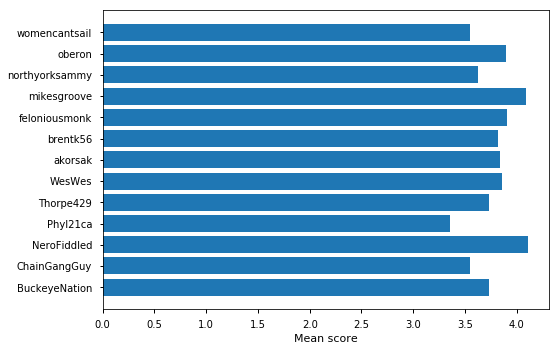

In [10]:
raters_data = raters_data[raters_data.rated_beer_amount >= 3000]
plt.barh(raters_data.review_profilename,raters_data.mean_score)
plt.xlabel("Mean score")
plt.show()

If we consider that the raters are unbiased we can say that the others are like them (between 3.0 and 4.0)

## Beers rating analysis

We will answer the question - __Does the beers overall rating depend on its alcohol content?__

And we will see the highest rated and the lowest rated beer style and brewery and other simillar things.

### Beer styles

Lets sort our data by beer style and see the mean score of every one style.

In [11]:
style_data = beer_reviews_data.groupby("beer_style")
print(style_data.review_overall.mean())

beer_style
Altbier                                3.824054
American Adjunct Lager                 3.001659
American Amber / Red Ale               3.781010
American Amber / Red Lager             3.564601
American Barleywine                    3.896756
American Black Ale                     3.934475
American Blonde Ale                    3.591741
American Brown Ale                     3.857434
American Dark Wheat Ale                3.643878
American Double / Imperial IPA         3.998017
American Double / Imperial Pilsner     3.858694
American Double / Imperial Stout       4.029820
American IPA                           3.965221
American Malt Liquor                   2.678854
American Pale Ale (APA)                3.852306
American Pale Lager                    3.408946
American Pale Wheat Ale                3.646918
American Porter                        3.895735
American Stout                         3.865311
American Strong Ale                    3.873501
American Wild Ale            

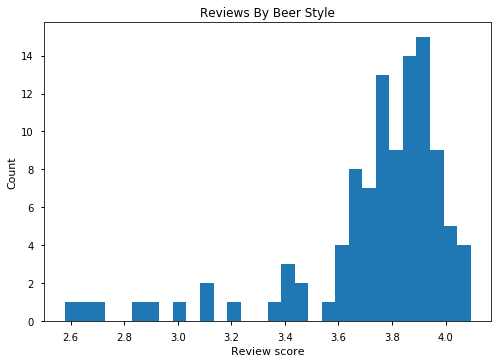

In [12]:
plt.hist(style_data.review_overall.mean(),bins = 30)
plt.title("Reviews By Beer Style")
plt.xlabel("Review score")
plt.ylabel("Count")
plt.show()


There are in total about 104 different beer styles(before doing this research i was thinking that they are about 4 :D ).



Lets see the best rated style and the lowest one.

In [13]:
print("The lowest rated beer style: ",style_data.review_overall.mean().idxmin(),round(style_data.review_overall.mean().min(),2))
print("The highest rated beer style: ", style_data.review_overall.mean().idxmax(),round(style_data.review_overall.mean().max(),2))

The lowest rated beer style:  Low Alcohol Beer 2.58
The highest rated beer style:  American Wild Ale 4.09


Let's see which styles are more - high rated or low rated. A high rated style will be a style that has rating more than 3.33 and a low rated style will be below 3.33.
The border is 3.33 because the difference between the highest rated and the lowest rated style is:
$$ 4.09 - 2.58 = 1.51 $$
That is approximately 1.50 and we will divide it by two because we will have two categories.
$$ 1.50 / 2 = 0.75 $$
So                $ 2.58 + 0.75 = 3.33 $

In [14]:
style_data = pd.DataFrame([style_data.review_overall.mean()])
style_data = style_data.T
style_data = style_data.reset_index()
style_data.head()

,beer_style,review_overall
0,Altbier,3.824054
1,American Adjunct Lager,3.001659
2,American Amber / Red Ale,3.781010
3,American Amber / Red Lager,3.564601
4,American Barleywine,3.896756


In [15]:
low_rated_styles = style_data[style_data.review_overall <= 3.33]
high_rated_styles = style_data[style_data.review_overall > 3.33]
print("Amount of low rated styles: ", low_rated_styles.shape[0])
print("Amount of high rated styles: ", high_rated_styles.shape[0])

Amount of low rated styles:  9
Amount of high rated styles:  95


In [16]:
print("Average rating and its standart deviation: ", round(style_data.mean(),2),round(style_data.std(),2))

Average rating and its standart deviation:  review_overall    3.73
dtype: float64 review_overall    0.3
dtype: float64


We can see that from the above line the mean rating is 3.73 and the standart deviation is 0.3 so we can conclude that most of the styles are with high rates which sounds good for the humans and the beer lovers.

We have a really low percents of low rated styles, only 9 and we can see their names.

In [17]:
low_rated_styles.beer_style

1     American Adjunct Lager
13      American Malt Liquor
34                Chile Beer
53           Euro Pale Lager
54         Euro Strong Lager
64                  Happoshu
69       Japanese Rice Lager
76               Light Lager
77          Low Alcohol Beer
Name: beer_style, dtype: object

__In conclusion we can say that most of the styles are high rated and on some point the overall rating of a beer depends on the style.__

### Breweries

Here we will repeat the same steps like the steps for the beer styles.

Lets sort our data by brewery and see the mean score for every one of them.

brewery_name
't Hofbrouwerijke                    3.702703
(512) Brewing Company                4.065789
10 Barrel Brewing Co.                3.732143
1516 Brewing Company                 4.132353
16 Mile Brewing Company              3.570652
1648 Brewing Company Ltd             3.500000
1702 / The Address Brewing Co.       4.000000
192 Brewing Company                  1.833333
1st City Brewery and Grill           3.666667
2 Brothers Brewery                   3.686275
21st Amendment Brewery               3.699295
23rd Street Brewery                  3.895349
2nd Shift Brewery                    3.772727
3 Cordilleras                        4.000000
3 Ravens Brewing                     3.549587
3 Stars Brewing Company              3.166667
32 Via Dei Birrai                    3.000000
4 Hands Brewing Co.                  4.500000
4 Pines Brewing Company              3.669492
4Seasons Sports Bar & Brew Pub       2.333333
4th Street Brewing Co.               3.693548
4th Street Brewing Co

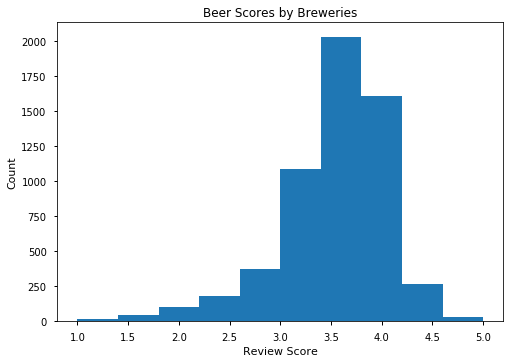

In [18]:
breweries_data = beer_reviews_data.groupby("brewery_name")
print(breweries_data.review_overall.mean())
plt.hist(breweries_data.review_overall.mean())
plt.title("Beer Scores by Breweries")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()

Well that is expected to be like the histogram of the beer ratings. The mean score is high.

Now we will check the highest and lowest rated breweries.

In [19]:
print("The lowest rated brewery: ",breweries_data.review_overall.mean().idxmin(),round(breweries_data.review_overall.mean().min(),2))
print("The highest rated brewery: ", breweries_data.review_overall.mean().idxmax(),round(breweries_data.review_overall.mean().max(),2))

The lowest rated brewery:  Bières De Carcassonne 1.0
The highest rated brewery:  Bad Wörishofer Lowenbrau / Privatbrauerei Hotel Braugasthof 5.0


Hmmm, 1.0 and 5.0 are little suspicious rating for a mean rating. We will see how many beers are rated from these breweries but first lets get them in a dataframe just for our help.

In [20]:
breweries_dataframe = pd.DataFrame([breweries_data.review_overall.mean()])
breweries_dataframe = breweries_dataframe.T
beer_count_per_brewery = breweries_data.review_overall.count()
breweries_dataframe["beer_amount"] = beer_count_per_brewery
breweries_dataframe = breweries_dataframe.reset_index()
breweries_dataframe.head()

,brewery_name,review_overall,beer_amount
0,'t Hofbrouwerijke,3.702703,37
1,(512) Brewing Company,4.065789,304
2,10 Barrel Brewing Co.,3.732143,84
3,1516 Brewing Company,4.132353,34
4,16 Mile Brewing Company,3.570652,92


In [21]:
print(breweries_dataframe[breweries_dataframe.brewery_name.str.contains("Bières De Carcassonne")].beer_amount)
print(breweries_dataframe[breweries_dataframe.brewery_name.str.contains("Bad Wörishofer Lowenbrau / Privatbrauerei Hotel Braugasthof")].beer_amount)

594    1
Name: beer_amount, dtype: int64
275    1
Name: beer_amount, dtype: int64


The left value is the index and the right one is the amount of beers. So it isn't right to compare breweries with one beer and breweries with over 100. So we will filter the breweries removing all that have less than 100 beers.

In [22]:
breweries_dataframe = breweries_dataframe[breweries_dataframe.beer_amount >= 100]
print(breweries_dataframe.shape)
breweries_dataframe.head()

(1222, 3)


,brewery_name,review_overall,beer_amount
1,(512) Brewing Company,4.065789,304
10,21st Amendment Brewery,3.699295,2978
14,3 Ravens Brewing,3.549587,121
29,75th Street Brewery,3.597222,108
31,8 Wired Brewing Co.,3.878882,161


Now it will be a little bit of more right and fair. Lets now check the lowest and the highest rated brewery.

In [23]:
print(breweries_dataframe[breweries_dataframe.review_overall == breweries_dataframe.review_overall.min()])
print(breweries_dataframe[breweries_dataframe.review_overall == breweries_dataframe.review_overall.max()])

        brewery_name  review_overall  beer_amount
1685  Chili Beer Co.        1.614183          416
       brewery_name  review_overall  beer_amount
5085  The Alchemist        4.582543          527


Interesting, if we make some research about these breweries we can see that they are from USA. And the most high rated beer style was "American Wild Ale" and in the lowest rated beer styles there were more american styles.

__In conclusion we can say that USA are producting a lot of beer and they have beers with plenty of different styles and rates.This is maybe normal because of the size and population of United States.In my support i will give a link for a website that say exactly that USA are producting a lot of beer - https://www.worldatlas.com/articles/top-10-beer-producing-nations.html__

### Does the beer overall rating depend on its alcohol content?

Let's answer this interesting question with some plots and then we will make a hypothesis testing.

First we will remove the NaN values, of course it there are any.

In [24]:
beer_reviews_data[beer_reviews_data.beer_abv.isna()]

,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
273,1075,Caldera Brewing Company,3.0,3.0,3.0,RedDiamond,American Stout,4.0,3.0,Cauldron Espresso Stout,NaN,21241
430,850,Moon River Brewing Company,3.5,4.0,4.5,cMonkey,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
603,850,Moon River Brewing Company,4.0,3.5,4.0,aracauna,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
733,1075,Caldera Brewing Company,4.0,4.0,4.0,plaid75,American IPA,4.0,4.0,Alpha Beta,NaN,54723
798,1075,Caldera Brewing Company,4.5,4.5,4.0,grumpy,American Double / Imperial Stout,4.0,4.5,Imperial Stout,NaN,42964
927,2724,Pacific Coast Brewing Company,1.0,1.5,3.0,womencantsail,American Strong Ale,2.5,1.5,Megalodon,NaN,64803
944,2724,Pacific Coast Brewing Company,1.5,2.0,1.5,JDV,Belgian Strong Pale Ale,1.0,3.0,Holiday Trappist Style Ale,NaN,41584
960,2724,Pacific Coast Brewing Company,4.0,3.5,4.0,hoegaardenhero,American Amber / Red Ale,4.5,3.5,Emerald Ale,NaN,37498
961,2724,Pacific Coast Brewing Company,4.0,4.0,4.0,barleywinefiend,American Amber / Red Ale,4.0,4.0,Emerald Ale,NaN,37498
962,2724,Pacific Coast Brewing Company,4.0,4.0,4.5,Mark,American Amber / Red Ale,4.5,4.0,Emerald Ale,NaN,37498


They are so many NaN values and maybe the best way to "fight with them" is to remove them because if we make them 0 or we replace them with the mean alcohol content it will maybe influence our final result.

In [25]:
beer_reviews_data_without_NaN_in_beer_abv = beer_reviews_data[~beer_reviews_data.beer_abv.isna()]
beer_reviews_data_without_NaN_in_beer_abv

,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,1075,Caldera Brewing Company,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,1075,Caldera Brewing Company,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


Now it is better. Let's make a histogram of the alcohol content of the beers.

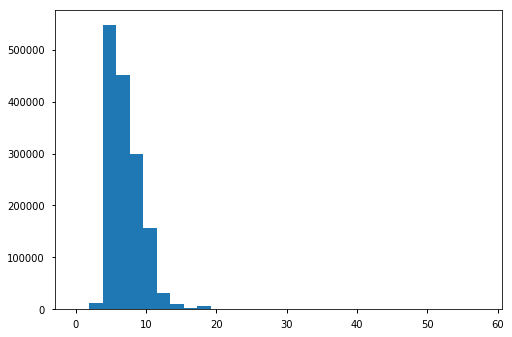

Mean alcohol content:  7.04
Standart Deviation:  2.32


In [26]:
plt.hist(beer_reviews_data_without_NaN_in_beer_abv.beer_abv,bins = 30)
plt.show()
print("Mean alcohol content: ",round(beer_reviews_data_without_NaN_in_beer_abv.beer_abv.mean(),2))
print("Standart Deviation: ",round(beer_reviews_data_without_NaN_in_beer_abv.beer_abv.std(),2))

Let's see which are the lowest and highest rated alcohol contents. We will sort the data by the alcohol content.

In [27]:
beer_abv_data = beer_reviews_data_without_NaN_in_beer_abv.groupby("beer_abv")
print("Lowest rated alcohol content: ",beer_abv_data.review_overall.mean().idxmin(),beer_abv_data.review_overall.mean().min())
print("Highest rated alcohol content: ",beer_abv_data.review_overall.mean().idxmax(),beer_abv_data.review_overall.mean().max())

Lowest rated alcohol content:  0.08 1.0
Highest rated alcohol content:  5.32 5.0


Maybe because 5.32 is one of the most common alcohol contents is high rated. Let's plot a scatter plot to see if there is some tendency.

[]

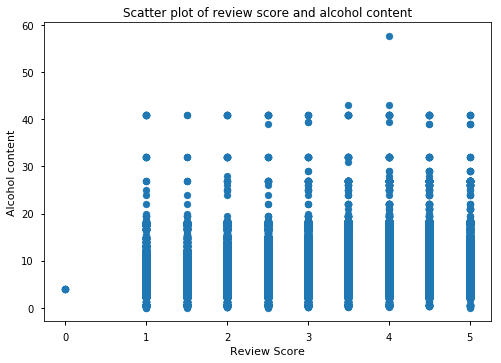

In [28]:
plt.scatter(beer_reviews_data_without_NaN_in_beer_abv.review_overall,beer_reviews_data_without_NaN_in_beer_abv.beer_abv)
plt.title("Scatter plot of review score and alcohol content")
plt.xlabel("Review Score")
plt.ylabel("Alcohol content")
plt.plot()

I don't see something so special so this didn't help us a lot but some visualization is never useless.

Lets divide the beer in two categories - Beer with low alcohol content and Beer with high alcohol content. We will assume that high alcohol content is above 7%.

In [29]:
low_alcohol_content_beers = beer_reviews_data_without_NaN_in_beer_abv[beer_reviews_data_without_NaN_in_beer_abv.beer_abv < 7]
high_alcohol_content_beers = beer_reviews_data_without_NaN_in_beer_abv[beer_reviews_data_without_NaN_in_beer_abv.beer_abv >= 7]
print("Beers with alcohol content below 7%: ",len(low_alcohol_content_beers.beer_name.unique()))
print("Beers with alcohol content above 7%: ",len(high_alcohol_content_beers.beer_name.unique()))

Beers with alcohol content below 7%:  30749
Beers with alcohol content above 7%:  13787


In [30]:
print("Correlation between review score and low alcohol content: ",low_alcohol_content_beers.review_overall.corr(low_alcohol_content_beers.beer_abv))
print("Correlation between review score and high alcohol content: ",high_alcohol_content_beers.review_overall.corr(high_alcohol_content_beers.beer_abv))

Correlation between review score and low alcohol content:  0.18739167001921414
Correlation between review score and high alcohol content:  -0.01996474169652482


The dataset contains more beers with low alcohol content. Lets make a hypothesis testing - are there significantly differences between the rating scores of the "strong" beers and the "weak" beers. We will assume that H0 is "There are no significantly differences" and H1 will be "There are significantly differences". We will asume also that the alpha level is 0.05.

In [31]:
f_oneway(low_alcohol_content_beers.review_overall,high_alcohol_content_beers.review_overall)

F_onewayResult(statistic=29051.382195903625, pvalue=0.0)

__Our p value is 0 and that is not bigger than our alpha level thats why we can conclude that there are no significantly differences between the review scores of the "strong" and "weak" beers.__

__So probably the answer of our question(Does the beer overall rating depend on its alcohol content?) is that the beer overall rating doesn't depend on its alcohol content.__

## Analysing proteins and vitamin B in beer

It is known that the beer contains proteins and vitamin B12. They are healthy and good for peoples. Proteins make up about 15 % of the mass of the average person. Muscle, cartilage, ligaments, skin and hair are all mainly protein materials.

And Vitamin B12 is a nutrient that helps keep the body's nerve and blood cells healthy and helps make DNA, the genetic material in all cells. Vitamin B12 also helps prevent a type of anemia called megaloblastic anemia that makes people tired and weak.

We will read a huge dataset about foods data and we will use only the beers for this dataset.

In [32]:
food_data = pd.read_table("data/en.openfoodfacts.org.products.tsv",low_memory=False)


In [33]:
food_data = food_data[~food_data.categories_en.isna()]

In [34]:
beers = food_data[food_data.categories_en.str.contains("beer|Beer")]
print(beers.shape)
beers.head()

(1637, 163)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
185,0000007020254,http://world-en.openfoodfacts.org/product/0000...,teolemon,1420150193,2015-01-01T22:09:53Z,1504376301,2017-09-02T18:18:21Z,Root Beer,NaN,33 cl e,...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,3.0,NaN,NaN
541,00024655,http://world-en.openfoodfacts.org/product/0002...,tacinte,1435406814,2015-06-27T12:06:54Z,1493549176,2017-04-30T10:46:16Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543,00024679,http://world-en.openfoodfacts.org/product/0002...,tacinte,1491060294,2017-04-01T15:24:54Z,1496824439,2017-06-07T08:33:59Z,Yorkshire Gold,Bière britannique ale dorée,500 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14294,0018200967153,http://world-en.openfoodfacts.org/product/0018...,openfoodfacts-contributors,1442690787,2015-09-19T19:26:27Z,1442753566,2015-09-20T12:52:46Z,Michelob ULTRA,NaN,12 FL.OZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26644,0030613000302,http://world-en.openfoodfacts.org/product/0030...,bdwyer,1437790210,2015-07-25T02:10:10Z,1437791151,2015-07-25T02:25:51Z,Brooklyn Lager,NaN,12 FL OZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We won't need 163 columns, we will need about 4-5. Thats why we will make a new dataframe.

In [35]:
beer_name = beers.product_name
beer_quantity = beers.quantity
proteins = beers.proteins_100g
vitamin_b12 = beers["vitamin-b12_100g"]

In [36]:
beers = pd.DataFrame([beer_name])
beers = beers.T
beers["beer_quantity"] = beer_quantity
beers["proteins_100g"] = proteins
beers["vitamin_b12_100g"] = vitamin_b12
beers_with_protein = beers[~beers.proteins_100g.isna()]
beers_with_protein.head()

,product_name,beer_quantity,proteins_100g,vitamin_b12_100g
185,Root Beer,33 cl e,0.000,NaN
109196,Ginger Beer,NaN,0.000,NaN
112913,King of beers,16 fl oz,0.361,NaN
112989,Bud Light,NaN,0.250,NaN
113219,Budweiser,"16 OZ, 1 Pint",1.300,NaN


Now we have all beers with protein in them. Let's plot a histogram of the proteins per 99 milliliters(100g beer are approximely 99ml).

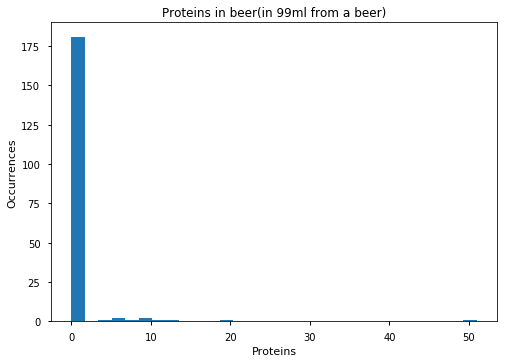

In [37]:
plt.hist(beers_with_protein.proteins_100g,bins = 30)
plt.title("Proteins in beer(in 99ml from a beer)")
plt.xlabel("Proteins")
plt.ylabel("Occurrences")
plt.show()

Most beers have a low amount of protein but we some with higher than 15. Let's check them

In [38]:
beers_with_high_protein = beers_with_protein[beers_with_protein.proteins_100g > 15]
beers_with_low_proteins = beers_with_protein[beers_with_protein.proteins_100g <= 15]
beers_with_low_proteins = beers_with_protein[beers_with_protein.proteins_100g > 0]
beers_with_high_protein

,product_name,beer_quantity,proteins_100g,vitamin_b12_100g
306726,Cuvée des trolls,75 cL,20.0,NaN
309270,Pack x6 Super Bock,6 x 25 cl,51.0,NaN


It will be interesting to see how are they rated, we need to check if they are in the first dataset with the beer reviews too.

In [39]:
print("Super Bock -","average score: ",beer_reviews_data[beer_reviews_data.beer_name == "Super Bock"].review_overall.mean()
     ,"alcohol content: ",round(beer_reviews_data[beer_reviews_data.beer_name == "Super Bock"].beer_abv.mean(),2))

Super Bock - average score:  2.96 alcohol content:  5.6


There is only one beer in our data with high amount of proteins so we can't compare it to the reviews of the beers with low proteins. But why not picking some beers with low protein amount and just see them.

In [40]:
beers_with_low_proteins

,product_name,beer_quantity,proteins_100g,vitamin_b12_100g
112913,King of beers,16 fl oz,0.361,NaN
112989,Bud Light,NaN,0.250,NaN
113219,Budweiser,"16 OZ, 1 Pint",1.300,NaN
135065,Coors Light,12 fl oz,0.278,NaN
150114,Corona Light,12 FL. OZ.,0.222,NaN
158919,Corona Light,12 FL. OZ.,0.222,NaN
177826,Bière blonde,33 cl,0.400,NaN
182703,Pilsner,33 cl,0.339,NaN
184885,Bière,33 cl e,0.090,NaN
190120,St Feuillien Cuvée de Noël,75 cl,0.700,NaN


In [41]:
print(beers_with_low_proteins[beers_with_low_proteins.proteins_100g == beers_with_low_proteins.proteins_100g.min()])

       product_name beer_quantity  proteins_100g  vitamin_b12_100g
347877     Biere 00           NaN           0.01               NaN


Above is the beer with the smallest protein amount

Now let's see all beers with vitamin B12.

In [42]:
beers_with_vitamin = beers[~beers.vitamin_b12_100g.isna()]
beers_with_vitamin.head()

,product_name,beer_quantity,proteins_100g,vitamin_b12_100g
198027,Bière blonde 1664 (pack de 20 x 25 cl) Kronenb...,5 L (20 x 25 cl),0.50,2.000000e-07
280437,Alkoholfei,"0,5 l",0.40,1.300000e-07
287167,Franziskaner Alkoholfrei,"6x0,33 l",0.55,3.300000e-07
287411,"Bitburger 0,0%","0,33 l",0.50,2.200000e-07


There are only four beers with vitamin B12 so unfortunately we don't have enough info to make some interesting experiments. Interesting is the fact that 3/4 of the beers with vitamin B12 are non-alcoholic beers("Alkoholfrei" means "non-alcoholic" on German).

## Beer Bottles and Cans Production in USA by states

We have seen that USA is one of the biggest beer producers. But now we will visualize this and we will observe it.

First we will load the data about the beer bottles and cans production in US.The dataset contains 7 columns, one for the state and the others are for each year between 2010 and 2015.

In [68]:
beer_production = pd.read_csv("data/ttb-aggregated-beer-data/aggr-data-beer-2010-2015_bottles-cans.csv")
beer_production.head()

,State,2010,2011,2012,2013,2014,2015
0,AK,"80,889.21","94,781.57","105,416.32","112,008.59","129,181.74","126,309.22"
1,AL,0.00,658.96,"2,485.79","6,634.43","9,521.26","10,543.00"
2,AR,"1,445.82","1,382.06",8.00,8.00,800.09,872.11
3,AZ,"10,380.26","14,057.56","18,411.25","22,318.65","29,645.05","44,081.10"
4,CA,"19,095,643.27","18,204,514.85","18,940,276.02","17,835,501.70","18,052,949.81","17,670,616.67"


We will use states.csv to change the State column because to make a choropleth map we need the full names of the states not the abbreviations, transform the strings into numbers and we will add another column in which we will store the mean consumption from the six years(to visualize it easier on the choropleth map).

In [69]:
state_names = pd.read_csv("data/choropleth_map/states.csv")
state_names_dict = {state.Abbreviation: state["State"]
for index, state in state_names.iterrows()}
beer_production.State.replace(state_names_dict, inplace = True)
beer_production.head()

,State,2010,2011,2012,2013,2014,2015
0,Alaska,"80,889.21","94,781.57","105,416.32","112,008.59","129,181.74","126,309.22"
1,Alabama,0.00,658.96,"2,485.79","6,634.43","9,521.26","10,543.00"
2,Arkansas,"1,445.82","1,382.06",8.00,8.00,800.09,872.11
3,Arizona,"10,380.26","14,057.56","18,411.25","22,318.65","29,645.05","44,081.10"
4,California,"19,095,643.27","18,204,514.85","18,940,276.02","17,835,501.70","18,052,949.81","17,670,616.67"


In [70]:
beer_production["2010"] = beer_production['2010'].str.replace(',','')
beer_production["2011"] = beer_production['2011'].str.replace(',','')
beer_production["2012"] = beer_production['2012'].str.replace(',','')
beer_production["2013"] = beer_production['2013'].str.replace(',','')
beer_production["2014"] = beer_production['2014'].str.replace(',','')
beer_production["2015"] = beer_production['2015'].str.replace(',','')
cols = ["2010","2011","2012","2013","2014","2015"]
beer_production[cols] = beer_production[cols].apply(pd.to_numeric, errors='coerce', axis=1)
beer_production.dtypes

State     object
2010     float64
2011     float64
2012     float64
2013     float64
2014     float64
2015     float64
dtype: object

In [73]:
mean_production = beer_production["2010"] + beer_production["2011"] + beer_production["2012"] + beer_production["2013"] + beer_production["2014"] + beer_production["2015"]
mean_production = mean_production / 6
beer_production["mean_production"] = mean_production
beer_production.reindex(beer_production.State)
beer_production.set_index('State', inplace=True)
beer_production.head()

,2010,2011,2012,2013,2014,2015,mean_production
State,,,,,,,
Alaska,80889.21,94781.57,105416.32,112008.59,129181.74,126309.22,1.080978e+05
Alabama,0.00,658.96,2485.79,6634.43,9521.26,10543.00,4.973907e+03
Arkansas,1445.82,1382.06,8.00,8.00,800.09,872.11,7.526800e+02
Arizona,10380.26,14057.56,18411.25,22318.65,29645.05,44081.10,2.314898e+04
California,19095643.27,18204514.85,18940276.02,17835501.70,18052949.81,17670616.67,1.829992e+07


In [81]:
def draw_usa_cholopleth_map(data,title):
    fig = plt.figure(figsize = (15, 10))
    m = Basemap(projection = "merc", llcrnrlon = -130, llcrnrlat = 23,
    urcrnrlon = -64, urcrnrlat = 50)
    us_info = m.readshapefile("data/choropleth_map/st99_d00", "states", drawbounds = True)
    colors = {}
    state_names = []
    cmap = plt.cm.Oranges
    vmin = data.mean_production.min()
    vmax = data.mean_production.max()
    for shape_dict in m.states_info:
        state_name = shape_dict["NAME"]
        # Skip DC and Puerto Rico
        if state_name not in ["District of Columbia", "Puerto Rico"]:
            sightings = data.mean_production[
            data.mean_production.index == state_name][0]
            colors[state_name] = cmap(
            np.sqrt((sightings - vmin) / (vmax - vmin)))[:3]
        state_names.append(state_name)
    
    ax = plt.gca()
    for nshape, seg in enumerate(m.states):
    # Skip DC and Puerto Rico
        if state_names[nshape] not in ["District of Columbia", "Puerto Rico"]:
            color = rgb2hex(colors[state_names[nshape]])
            poly = Polygon(seg, facecolor = color, edgecolor = color)
            ax.add_patch(poly)
    plt.title(title)
    colorbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
    matplotlib.colorbar.ColorbarBase(colorbar_ax, cmap = cmap,norm = matplotlib.colors.Normalize(vmin, vmax))
    plt.show()

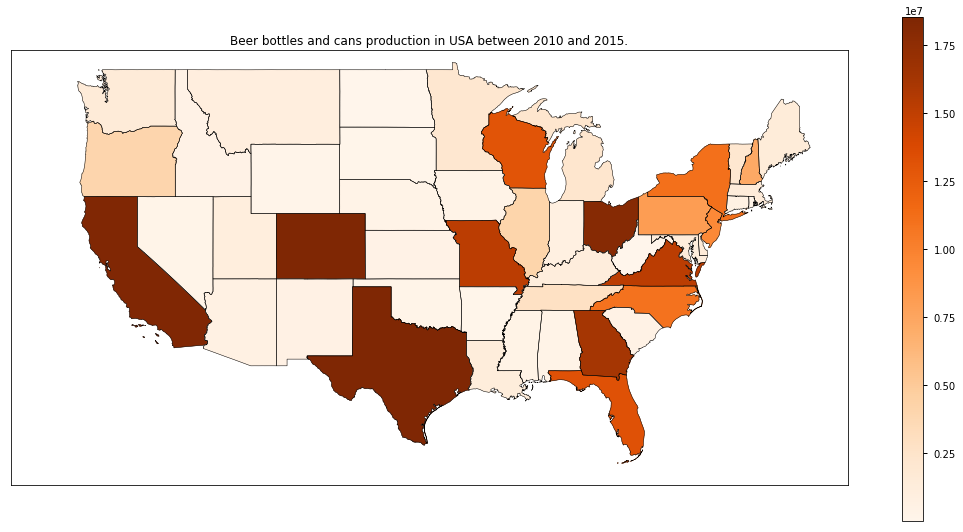

In [82]:
draw_usa_cholopleth_map(beer_production,"Beer bottles and cans production in USA between 2010 and 2015.")

Now it is better to perceive the production dataset. 
We can see that most beer cans and bottles were produced in __California__, __Texas__, __Colorado__,__Missouri__,__Georgia__,__Virginia__ and __Ohio__. 

And in states like __Nevada__, __Utah__, __Nebraska__,__Kansas__ and __Alabama__ beer production is not so massive.

## Conclusion

We have read and clean a dataset for beer_reviews, we analyze the dataset and we looked at some interesting things like the breweries, the beer style and the alcohol content. We answered the big question - "Does the beer overall rating depend on its alcohol content?" and we make a ANOVA test for that. Also we analyse the protein and the vitamin B12 in beer and at last but not on last place we looked at the beer cans and bottles production in USA between 2010 and 2015 year by plotting a cholopleth map.

## Resources

Links for the datasets i have used: 

beer_reviews.csv - https://data.world/mathiasburton/beer-curious/workspace

aggr-data-beer-2010-2015_bottles-cans.csv - https://data.world/ttb/aggregated-beer-data

states.csv - https://github.com/jasonong/List-of-US-States/blob/master/states.csv

st99_d00 files for the US cholopleth map - https://github.com/matplotlib/basemap/tree/master/examples
